In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\bhavi\Desktop\E-commerce sales analysis\women_clothing_ecommerce_sales.csv")

In [15]:
df.shape

(527, 8)

In [17]:
df.columns

Index(['order_id', 'order_date', 'sku', 'color', 'size', 'unit_price',
       'quantity', 'revenue'],
      dtype='object')

In [19]:
df.head(5)

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    527 non-null    int64 
 1   order_date  527 non-null    object
 2   sku         527 non-null    object
 3   color       527 non-null    object
 4   size        490 non-null    object
 5   unit_price  527 non-null    int64 
 6   quantity    527 non-null    int64 
 7   revenue     527 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 33.1+ KB


In [23]:
df.isnull().sum()

order_id       0
order_date     0
sku            0
color          0
size          37
unit_price     0
quantity       0
revenue        0
dtype: int64

In [25]:
df = df.dropna(subset=['size'])

In [27]:
print(df['size'].isnull().sum())

0


In [29]:
df.shape

(490, 8)

In [31]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [33]:
df['order_date'] = df['order_date'].dt.strftime('%d-%m-%Y')

In [35]:
print(df['order_date'])

0      01-06-2022
1      01-06-2022
2      10-06-2022
3      10-06-2022
4      11-06-2022
          ...    
522    09-09-2022
523    09-09-2022
524    09-09-2022
525    09-09-2022
526    09-09-2022
Name: order_date, Length: 490, dtype: object


In [79]:
df = df[df['sku'] != 'bobo']

In [41]:
df.shape

(474, 8)

In [43]:
df.head(15)

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,01-06-2022,708,Dark Blue,2XL,298,1,298
1,1,01-06-2022,89,Dark Blue,2XL,258,1,258
3,3,10-06-2022,799,Dark Blue,XL,264,1,264
4,4,11-06-2022,799,Dark Blue,M,264,1,264
5,5,11-06-2022,799,Dark Blue,XL,264,1,264
6,6,11-06-2022,799,Dark Blue,XL,264,1,264
7,7,11-06-2022,708,Dark Blue,3XL,278,1,278
8,8,11-06-2022,708,Dark Blue,XL,278,1,278
10,10,12-06-2022,708,Dark Blue,XL,278,1,278
11,11,12-06-2022,708,Dark Blue,3XL,278,1,278


In [81]:
df.loc[:, 'sku'] = df['sku'].astype(int)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 474 entries, 2022-06-01 to 2022-09-09
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    474 non-null    int64 
 1   sku         474 non-null    object
 2   color       474 non-null    object
 3   size        474 non-null    object
 4   unit_price  474 non-null    int64 
 5   quantity    474 non-null    int64 
 6   revenue     474 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 29.6+ KB


In [49]:
print(df['order_date'].dtype)

object


In [51]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')

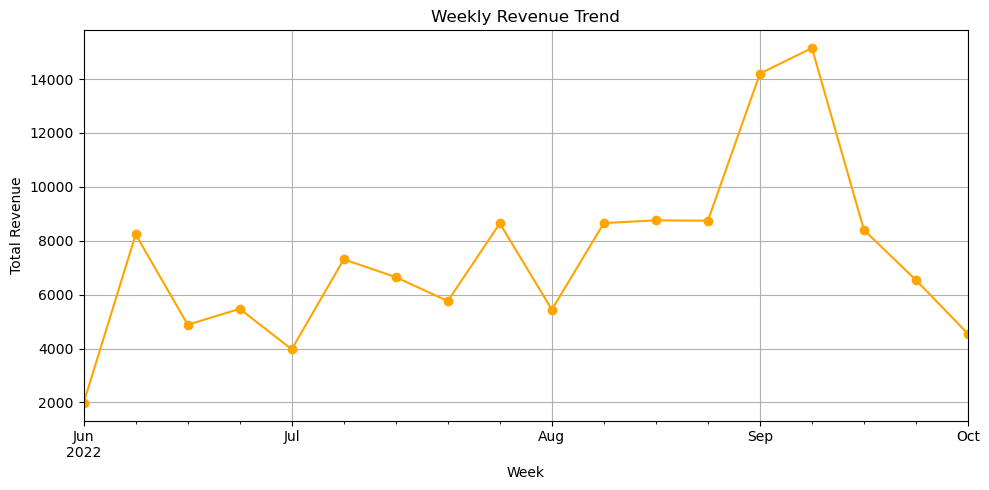

In [53]:
# Ensure order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')

# Set order_date as the index
df.set_index('order_date', inplace=True)

# Group by week and sum the revenue
weekly_revenue = df.resample('W')['revenue'].sum()

# Plot the weekly revenue
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
weekly_revenue.plot(marker='o', color='orange')
plt.title("Weekly Revenue Trend")
plt.xlabel("Week")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


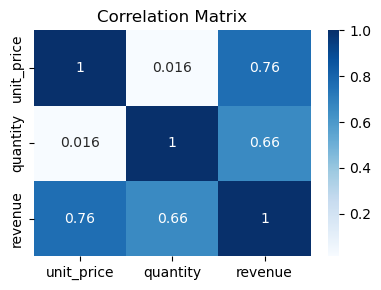

In [74]:
plt.figure(figsize=(4, 3))
sns.heatmap(df[['unit_price', 'quantity', 'revenue']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [7]:
# Group by SKU and calculate total revenue
sku_sales = df.groupby('sku')['revenue'].sum().sort_values(ascending=False)

# Best-selling SKU
best_sku = sku_sales.idxmax()
best_sku_value = sku_sales.max()

# Worst-selling SKU
worst_sku = sku_sales.idxmin()
worst_sku_value = sku_sales.min()

print(f"Best-selling SKU: {best_sku} with revenue {best_sku_value}")
print(f"Worst-selling SKU: {worst_sku} with revenue {worst_sku_value}")


Best-selling SKU: 799 with revenue 79182
Worst-selling SKU: 29 with revenue 227


C:\Users\bhavi\AppData\Local\Temp\ipykernel_15228\1763487414.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sku', y='revenue', data=top_skus, palette='viridis')


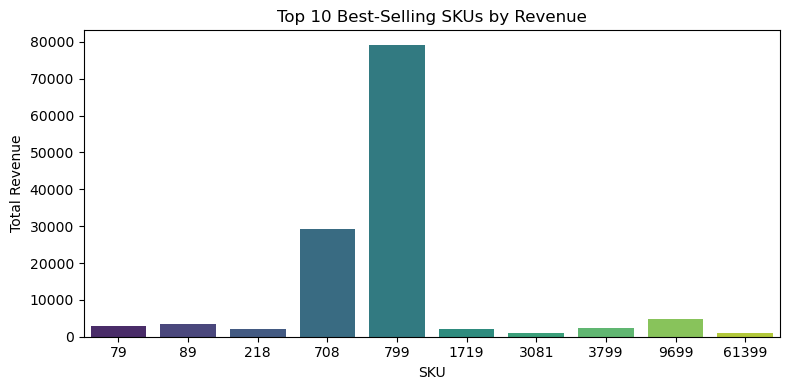

In [55]:
sku_revenue = df.groupby('sku')['revenue'].sum()

plt.figure(figsize=(6, 4))
sku_revenue.plot(kind='bar', color='skyblue')
plt.title("Revenue by SKU")
plt.xlabel("SKU")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\bhavi\AppData\Local\Temp\ipykernel_15228\3908053451.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sku', y='revenue', data=bottom_skus, palette='coolwarm')


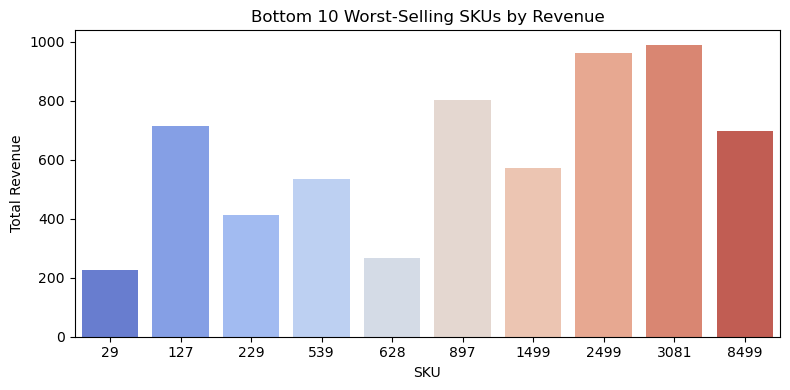

In [65]:
# Bottom 10 SKUs by revenue
bottom_skus = df.groupby('sku')['revenue'].sum().sort_values(ascending=True).head(10).reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='sku', y='revenue', data=bottom_skus, palette='coolwarm')
plt.title("Bottom 10 Worst-Selling SKUs by Revenue")
plt.xlabel("SKU")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

